In [1]:
#!wget "https://gist.githubusercontent.com/jahirmedinacs/876002f8d9a6ebe38c2142f5e5333ab3/raw/7bb4259e28e64de8de99b30f155169c09e9e1755/sofo_raw_data.csv"

In [2]:
from pprint import pprint as pprint
from copy import copy as copy

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
raw_data = pd.read_csv("./sofo_raw_data.csv")

In [5]:
pprint(raw_data.columns)

Index(['Status', 'Sample Name', 'Sample Type', 'Size Standard',
       'Analysis Method', 'SQI', 'Offscale', 'Quality', 'UD1', 'UD2', 'UD3',
       'Dye/Sample Peak', 'Sample File Name', 'Size', 'Height',
       'Area in Point', 'Area in BP', 'Data Point', 'Begin Point', 'Begin BP',
       'End Point', 'End BP', 'Width in Point', 'Width in BP', 'User Comments',
       'User Edit'],
      dtype='object')


> Renaming columns , to quick acces as objects

In [6]:
new_cols = []
for ii in raw_data:
  new_cols += [ii.replace(" ", "_").replace("/","_")]
  
raw_data.rename(columns=dict(zip(raw_data.columns, new_cols)), inplace=True)
raw_data.columns

Index(['Status', 'Sample_Name', 'Sample_Type', 'Size_Standard',
       'Analysis_Method', 'SQI', 'Offscale', 'Quality', 'UD1', 'UD2', 'UD3',
       'Dye_Sample_Peak', 'Sample_File_Name', 'Size', 'Height',
       'Area_in_Point', 'Area_in_BP', 'Data_Point', 'Begin_Point', 'Begin_BP',
       'End_Point', 'End_BP', 'Width_in_Point', 'Width_in_BP', 'User_Comments',
       'User_Edit'],
      dtype='object')

In [7]:
display(raw_data.Sample_File_Name.unique().size)

for ii in raw_data.Sample_File_Name.value_counts().index:
  if "OTU" in ii:
    print("Archivo {:s} :>>> {:d}".format(ii, raw_data.Sample_File_Name.value_counts()[ii]))
  

84

Archivo OC6-C49,OTU6-CLON35.fsa :>>> 986
Archivo OC1-C1,OTU8-CLON1.fsa :>>> 854
Archivo OC2-C3,OTU5-CLON2.fsa :>>> 854
Archivo OC3-C4,OTU6-CLON3.fsa :>>> 700
Archivo OC4-C19,OTU3-CLON12.fsa :>>> 692
Archivo OC5-C20,OTU9-CLON13.fsa :>>> 614
Archivo OC11-C69,OTU7-CLON53.fsa :>>> 530
Archivo OC12-C80, OTU9-CLON62.fsa :>>> 475
Archivo OC7-C58,OTU4-CLON44.fsa :>>> 414
Archivo OC9-C63,OTU4-CLON63.fsa :>>> 376
Archivo OC10-C65,OTU2-CLON50.fsa :>>> 357
Archivo OC8-C60,OTU1-CLON46.fsa :>>> 318


In [8]:
for ii in raw_data.Sample_File_Name.unique():
  print(ii.split(","))

['DC-A1.A__MC1A.fsa']
['DC-A1.B__MC1B.fsa']
['DC-A2.A__MC29A.fsa']
['DC-A2.B__MC29B.fsa']
['DC-A4.A__MC2A.fsa']
['DC-A4.B__MC2B.fsa']
['DC-A5.A__MC3A.fsa']
['DC-A5.B__MC3B.fsa']
['DC-B1.A__MC4A.fsa']
['DC-B1.B__MC4B.fsa']
['DC-B2.A__MC5A.fsa']
['DC-B2.B__MC5B.fsa']
['DC-B4.A__MC6A.fsa']
['DC-B4.B__MC6B.fsa']
['DC-B5.A__MC30A.fsa']
['DC-B5.B__MC30B.fsa']
['DC-C1.A__MC7A.fsa']
['DC-C1.B__MC7B.fsa']
['DC-C2.A__MC31A.fsa']
['DC-C2.B__MC31B.fsa']
['DC-C3.A__MC8A.fsa']
['DC-C3.B__MC8B.fsa']
['DC-C5.A__MC9A.fsa']
['DC-C5.B__MC9B.fsa']
['LM-A1.A__MC10A.fsa']
['LM-A1.B__MC10B.fsa']
['LM-A2.A__MC11A.fsa']
['LM-A2.B__MC11B.fsa']
['LM-A3.A__MC32A.fsa']
['LM-A3.B__MC32B.fsa']
['LM-A4.A__MC12A.fsa']
['LM-A4.B__MC12B.fsa']
['LM-B1.A__MC13A.fsa']
['LM-B1.B__MC13B.fsa']
['LM-B2.A__MC14A.fsa']
['LM-B2.B__MC14B.fsa']
['LM-B3.A__MC15A.fsa']
['LM-B3.B__MC15B.fsa']
['LM-B5.A__MC33A.fsa']
['LM-B5.B__MC33B.fsa']
['LM-C1.A__MC16A.fsa']
['LM-C1.B__MC16B.fsa']
['LM-C2.A__MC17A.fsa']
['LM-C2.B__MC17B.fsa']
['LM-C

### NA and data imputation

In [9]:
total_rows = raw_data.shape[0]

In [10]:
__temp = raw_data.isna().astype(np.int).sum()
__empty_cols = []
for ii in __temp.index:
  if __temp[ii] == total_rows:
    __empty_cols += [ii]
    
pprint(__empty_cols)

['UD1', 'UD2', 'UD3', 'User_Comments', 'User_Edit']


In [11]:
raw_data.drop(columns=__empty_cols, inplace=True)
raw_data.sample(1)

,Status,Sample_Name,Sample_Type,Size_Standard,Analysis_Method,SQI,Offscale,Quality,Dye_Sample_Peak,Sample_File_Name,...,Height,Area_in_Point,Area_in_BP,Data_Point,Begin_Point,Begin_BP,End_Point,End_BP,Width_in_Point,Width_in_BP
546,Analyzed,D-A1B,Sample,GS500LIZ_3730,Sizing Default - PP,False,Pass,Pass,"R, 32",DC-A1.B__MC1B.fsa,...,1342,14974,1348,1343,1331,49.7253,1357,52.0665,12,1.1313


In [12]:
__non_variance_cols = []
for ii in raw_data.columns:
  __temp = raw_data[ii].value_counts()
#   print(__temp.shape[0])
  if __temp.shape[0] == 1:
    __non_variance_cols += [ii]
    print("Column [\"{:s}\"] with ONE UNIQUE [\"{:s}\"]".format(ii, str(__temp.index[0])))
    
pprint(__non_variance_cols)

Column ["Status"] with ONE UNIQUE ["Analyzed"]
Column ["Sample_Type"] with ONE UNIQUE ["Sample"]
Column ["Size_Standard"] with ONE UNIQUE ["GS500LIZ_3730"]
Column ["Analysis_Method"] with ONE UNIQUE ["Sizing Default - PP"]
Column ["SQI"] with ONE UNIQUE ["False"]
['Status', 'Sample_Type', 'Size_Standard', 'Analysis_Method', 'SQI']


In [13]:
raw_data.drop(columns=__non_variance_cols, inplace=True)
raw_data.sample(1)

,Sample_Name,Offscale,Quality,Dye_Sample_Peak,Sample_File_Name,Size,Height,Area_in_Point,Area_in_BP,Data_Point,Begin_Point,Begin_BP,End_Point,End_BP,Width_in_Point,Width_in_BP
32921,OC12,Pass,Pass,"Y, 20","OC12-C80, OTU9-CLON62.fsa",21.4286,69,584,53,1069,1065,21.0623,1080,22.4359,4,0.4491


In [14]:
raw_data.Offscale.value_counts()

Pass     32082
Check     6025
Name: Offscale, dtype: int64

#### Getting Non Numeric Data

>>> Alternative Processing in Data_Exploration_II.pyibn

In [15]:
__non_num_data = []
__temp = raw_data.dtypes
for ii in __temp.index:
  if __temp[ii] == 'object':
    __non_num_data += [ii]
    
pprint(__non_num_data)

['Sample_Name', 'Offscale', 'Quality', 'Dye_Sample_Peak', 'Sample_File_Name']


In [16]:
for ii in __non_num_data:
  print("\n\n{:s}  | Filas : {:d}".format(ii, raw_data[ii].value_counts().shape[0]))
  display(raw_data[ii].value_counts().sample(2))
  



Sample_Name  | Filas : 84


L-C3A    517
L-A4A    303
Name: Sample_Name, dtype: int64



Offscale  | Filas : 2


Pass     32082
Check     6025
Name: Offscale, dtype: int64



Quality  | Filas : 2


Pass     36952
Check     1155
Name: Quality, dtype: int64



Dye_Sample_Peak  | Filas : 1040


B, 217     8
B, 96     58
Name: Dye_Sample_Peak, dtype: int64



Sample_File_Name  | Filas : 84


MS-C1.A__MC25A.fsa    541
MS-C3.A__MC27A.fsa    646
Name: Sample_File_Name, dtype: int64

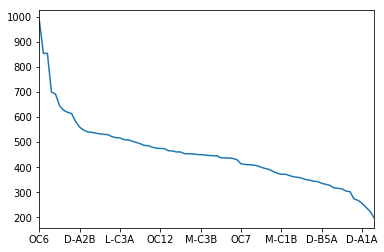

In [17]:
raw_data.Sample_Name.value_counts().plot()

In [18]:
raw_data[raw_data.Sample_Name == 'OC6'].sample()

,Sample_Name,Offscale,Quality,Dye_Sample_Peak,Sample_File_Name,Size,Height,Area_in_Point,Area_in_BP,Data_Point,Begin_Point,Begin_BP,End_Point,End_BP,Width_in_Point,Width_in_BP
36568,OC6,Pass,Pass,"Y, 230","OC6-C49,OTU6-CLON35.fsa",600.5882,63,266,22,9095,9092,600.3361,9103,601.2605,3,0.283


In [19]:
raw_data.shape

(38107, 16)

#### Filter Data

> Data Select by specialist

In [36]:
_filtered_sample_name = pd.read_csv("./Filter_sample_name_sofo.csv")
_filtered_sample_name = pd.DataFrame(_filtered_sample_name[_filtered_sample_name.columns[-1]])
display(_filtered_sample_name.sample(5))

,0
4,D-A4A
64,M-C1A
23,D-C5B
10,D-B2A
54,M-A5A


In [38]:
raw_filterd_sample_name = [ii[0] for ii in _filtered_sample_name.values.tolist()]

In [42]:
_alt_temp = raw_data[raw_data.Sample_Name.isin(raw_filterd_sample_name)]
_alt_temp.to_csv("./pre_pro1.csv", columns=_alt_temp.columns)

In [23]:
_alt_temp.Sample_Name.unique().tolist() == raw_filterd_sample_name

True

count     72.000000
mean     429.680556
std       96.359337
min      198.000000
25%      361.500000
50%      446.000000
75%      495.250000
max      646.000000
Name: Sample_Name, dtype: float64

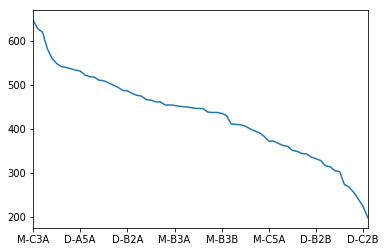

In [24]:
display(_alt_temp.Sample_Name.value_counts().plot())
display(_alt_temp.Sample_Name.value_counts().describe())

In [25]:
amount_per_sample = _alt_temp.Sample_Name.value_counts()

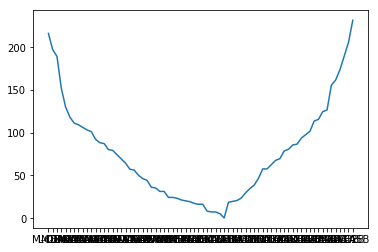

In [26]:
plt.plot((amount_per_sample - amount_per_sample.mean()).abs())

In [27]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [28]:
y = (amount_per_sample - amount_per_sample.mean()).abs().values
x = np.arange(y.shape[0], dtype=float)

10.348765879129948
0.9668395260504343


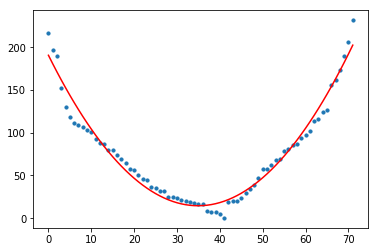

In [29]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly,y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x,y, s=10)

#sort_axis = operator.item

plt.plot(x, y_poly_pred, color='r')
plt.show()

In [30]:
amount_per_sample

M-C3A    646
L-C2A    627
M-B4A    619
D-A4A    582
D-A2B    560
D-B1B    548
M-C1A    541
D-A2A    539
M-A4A    536
M-A4B    533
D-A5A    531
M-B1B    522
D-C1B    518
L-C3A    517
L-B3A    510
M-A2A    509
M-B1A    504
M-C2A    499
D-A1B    494
D-C5A    487
D-B2A    486
L-C4B    480
D-B1A    476
D-C5B    474
L-C4A    466
D-A5B    465
D-A4B    461
M-B5B    461
M-B4B    454
M-A5A    454
        ... 
L-B1A    411
D-B4B    410
L-B1B    409
L-A1B    406
L-C1B    400
D-C3B    395
M-B5A    391
L-C1A    383
M-C5A    372
M-C1B    372
D-C3A    367
L-B2A    362
M-A3B    360
D-C2A    351
L-A2B    349
L-A3A    344
M-C2B    343
D-B5A    336
D-B2B    332
L-A3B    328
L-A2A    316
D-B5B    314
L-A4B    305
L-A4A    303
M-C5B    274
L-B5B    268
D-A1A    256
L-C3B    240
D-C2B    224
M-A5B    198
Name: Sample_Name, Length: 72, dtype: int64

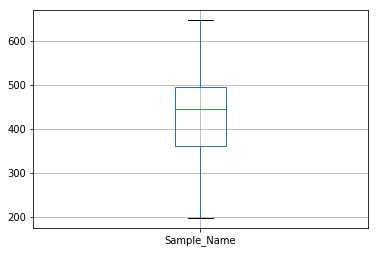

In [31]:
pd.DataFrame(_alt_temp.Sample_Name.value_counts()).boxplot()

In [32]:
amount_per_sample = (amount_per_sample - amount_per_sample.mean()) / amount_per_sample.std()

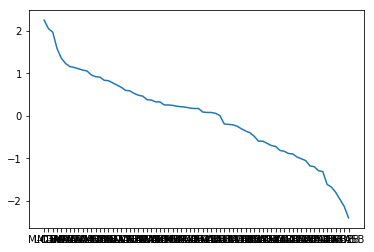

In [33]:
plt.plot(amount_per_sample)

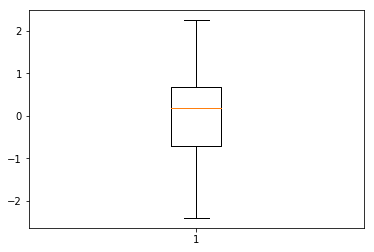

In [34]:
plt.boxplot(amount_per_sample)
plt.show()

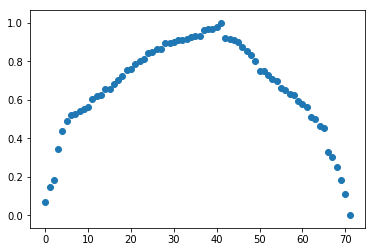

In [35]:
_alt_temp = -amount_per_sample.abs()
ref_idx = _alt_temp.index
y = (_alt_temp -_alt_temp.min()) / (_alt_temp.max() - _alt_temp.min())
x = np.arange(y.shape[0], dtype=float)
name_per_idx = list(zip(x,ref_idx))

plt.scatter(x,y)
